# Problem 1 solution


In [1]:
from sklearn import datasets
import matplotlib as mpl
from sklearn import metrics
from pandas_ml import ConfusionMatrix
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\prabh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
mydata = pd.read_csv('bank.csv',delimiter=';', engine='python')

In [4]:
mydata.columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

In [5]:
mydata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
mydata.info()
mydata.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [7]:
mydata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:

mydata_new = mydata

In [9]:
le = preprocessing.LabelEncoder()



In [10]:
#encoding into binary
job_new = le.fit_transform(mydata.job)
marital_new   = le.fit_transform(mydata.marital)
education_new = le.fit_transform(mydata.education)
default_new = le.fit_transform(mydata.default)
housing_new = le.fit_transform(mydata.housing)
loan_new = le.fit_transform(mydata.loan)
contact_new = le.fit_transform(mydata.contact)
month_new=le.fit_transform(mydata.month)
poutcome_new = le.fit_transform(mydata.poutcome)
y_new = le.fit_transform(mydata.y)

In [11]:
#initialize encoded categorical columns
mydata_new['job_new']=job_new
mydata_new['marital_new']=marital_new 
mydata_new['education_new']=education_new
mydata_new['default_new']=default_new 
mydata_new['housing_new']=housing_new
mydata_new['loan_new']=loan_new
mydata_new['contact_new']=contact_new 
mydata_new['month_new']=month_new
mydata_new['poutcome_new']=poutcome_new
mydata_new['y_new']=y_new

In [12]:
#drop the old categorical columns from dataframe
dummy_fields = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
mydata_new = mydata_new.drop(dummy_fields, axis = 1)

In [13]:
mydata_new.head()


,age,balance,day,duration,campaign,pdays,previous,job_new,marital_new,education_new,default_new,housing_new,loan_new,contact_new,month_new,poutcome_new,y_new
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


In [14]:

mydata_new = mydata_new.reindex_axis(['age', 'job_new', 'marital_new', 'education_new',
                                    'default_new', 'balance', 'housing_new',
                                    'loan_new', 'contact_new', 'day', 'month_new',
                                    'duration', 'campaign', 'pdays','previous','poutcome_new',
                                    'y_new' ], axis= 1)
 
mydata_new.head(4)

,age,job_new,marital_new,education_new,default_new,balance,housing_new,loan_new,contact_new,day,month_new,duration,campaign,pdays,previous,poutcome_new,y_new
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0


In [15]:
num_features = ['age', 'job_new', 'marital_new', 'education_new',
                                    'default_new', 'balance', 'housing_new',
                                    'loan_new', 'contact_new', 'day', 'month_new',
                                    'duration', 'campaign', 'pdays','previous','poutcome_new']

 



In [16]:
#for standardization [x-mean(x)]/sigma(x)

scaled_features = {}
for each in num_features:
    mean, std = mydata_new[each].mean(), mydata_new[each].std()
    scaled_features[each] = [mean, std]
    mydata_new.loc[:, each] = (mydata_new[each] - mean)/std

In [17]:
features = mydata_new.values[:,:16]
target = mydata_new.values[:,16]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.20, random_state = 10)

#features_train and target_train consists of training data 
#features_test and target_test consists of testing data

In [18]:
#traing error
clf = GaussianNB()
clf.fit(features_train, target_train)
target_hat=clf.predict(features_train)

In [19]:
print ("Training Error")
print (metrics.accuracy_score(target_train, target_hat))

Training Error
0.8456858407079646


In [20]:
target_pred = clf.predict(features_test)
print ("Testing Error")
accuracy_score(target_test, target_pred, normalize = True)

Testing Error


0.830939226519337

In [21]:
#np.random.seed()
seed=719
actuals=[]
probs=[]
hats=[]


In [22]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(features, target):
    #print('train: %s, test: %s' % (train, test))
    # Train classifier on training data, predict test data
    clf.fit(features[train], target[train])
    foldhats = clf.predict(features[test])
    foldprobs = clf.predict_proba(features[test])[:,1] # Class probability estimates for ROC curve
    actuals = np.append(actuals, target[test]) #Combine targets, then probs, and then predictions from each fold
    probs = np.append(probs, foldprobs)
    hats = np.append(hats, foldhats)

print ("Crossvalidation Error" )   
print ("CVerror = ", metrics.accuracy_score(actuals,hats))
print (metrics.classification_report(actuals, hats))
cm = ConfusionMatrix(actuals,hats)
print (cm)
cm.print_stats()


Crossvalidation Error
CVerror =  0.8314532183145322
             precision    recall  f1-score   support

        0.0       0.92      0.88      0.90      4000
        1.0       0.32      0.42      0.37       521

avg / total       0.85      0.83      0.84      4521

Predicted   0.0  1.0  __all__
Actual                       
0.0        3539  461     4000
1.0         301  220      521
__all__    3840  681     4521
population: 4521
P: 521
N: 4000
PositiveTest: 681
NegativeTest: 3840
TP: 220
TN: 3539
FP: 461
FN: 301
TPR: 0.42226487523992323
TNR: 0.88475
PPV: 0.32305433186490456
NPV: 0.9216145833333333
FPR: 0.11525
FDR: 0.6769456681350955
FNR: 0.5777351247600768
ACC: 0.8314532183145322
F1_score: 0.36605657237936773
MCC: 0.27407480087500635
informedness: 0.3070148752399233
markedness: 0.24466891519823797
prevalence: 0.11523999115239991
LRP: 3.6639034727975983
LRN: 0.6529925117378659
DOR: 5.610942555905477
FOR: 0.07838541666666667


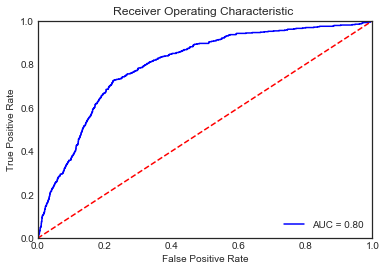

In [23]:
fpr, tpr, threshold = metrics.roc_curve(actuals, probs)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    